<a href="https://colab.research.google.com/github/macrodatascience/ML_Projects/blob/main/ML_Project_1_Rock_or_Mine_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **This project utilizes the SONAR dataset and performs Data pre-processing, and since the objective is to predict whether or not the object is a mine or a rock, it is a Binary classification problem, and hence we fit a Logistic regression model. We utilize the Trained model to make predictions i-e whether the object is a rock or a mine.** 

## **Thanks to Siddhardhan for his tutorial**

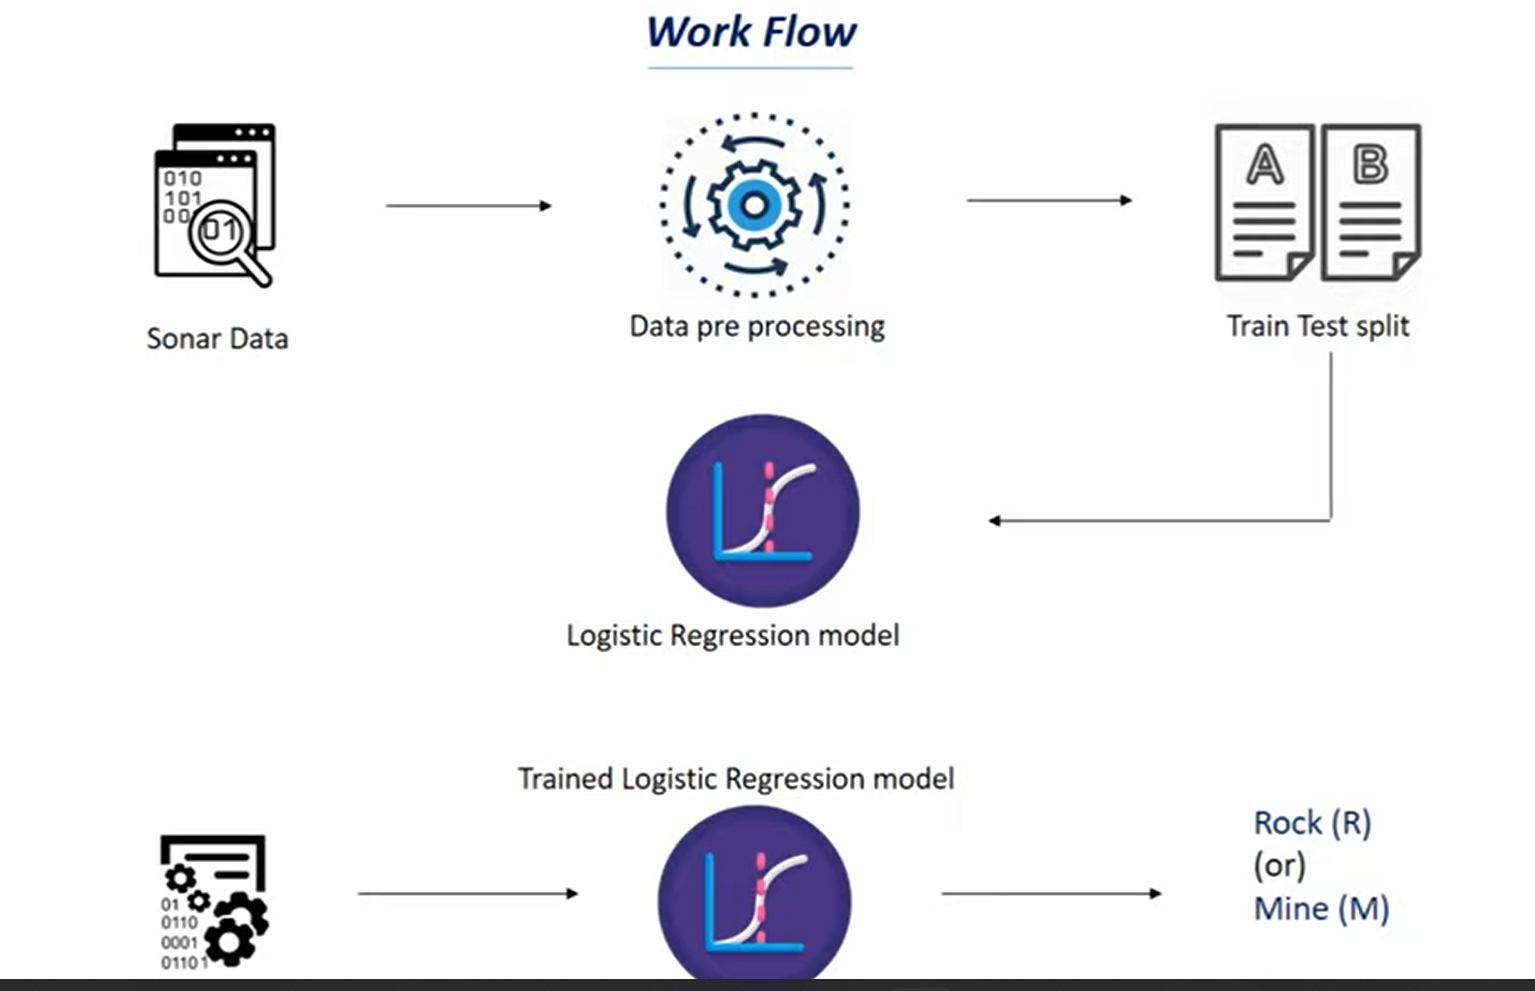

**Step 1 - Importing the Library Dependencies**

In [57]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.metrics import accuracy_score, r2_score

**Step 2 - Data Collection and Data Processing**

In [9]:
#loading the dataset to a pandas Dataframe
sonar_data = pd.read_csv('./sonar_data.csv', header=None)

In [11]:
sonar_data.head(), sonar_data.shape

(       0       1       2       3       4       5       6       7       8   \
 0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
 1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
 2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
 3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
 4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
 
        9   ...      51      52      53      54      55      56      57  \
 0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
 1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
 2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
 3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
 4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
 
        58      59  60  
 0  0.0090  0.0032   R  
 1  0.0052  0.0044   R  
 2 

In [14]:
# number of rows and columns
sonar_data.shape

(208, 61)

In [15]:
sonar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [13]:
sonar_data.describe()  #describe --> statistical measures of the data

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [18]:
sonar_data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [19]:
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

M --> Mine

R --> Rock

In [24]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [42]:
# separating features and target variable

X = sonar_data.drop(columns=60, axis=1)
# X = sonar_data[:59]
y = sonar_data[60]
# y = sonar_data.iloc[:,-1] 

In [46]:
print("Features : ")
print(X)
print("Target :")
print(y)

Features : 
         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      5

Training and Test data

In [81]:
for test_size in range(10, 35, 5):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, stratify=y, random_state=1)
  print(f"test_size is {test_size/100} and train_size is {1-test_size/100}")
  print(X.shape, X_train.shape, X_test.shape)

  model = LogisticRegression()

  #Training the Logistic Regression model with training data

  model.fit(X_train, y_train)

  #Model Validation
  #accuracy on training data
  X_train_prediction = model.predict(X_train)
  training_data_accuracy = accuracy_score(X_train_prediction, y_train)
  print('Accuracy on training data : ', training_data_accuracy)

  #accuracy on test data
  X_test_prediction = model.predict(X_test)
  test_data_accuracy = accuracy_score(X_test_prediction, y_test) 
  print('Accuracy on test data : ', test_data_accuracy)
  print()
  print()

test_size is 0.1 and train_size is 0.9
(208, 60) (198, 60) (10, 60)
Accuracy on training data :  0.8333333333333334
Accuracy on test data :  0.7


test_size is 0.15 and train_size is 0.85
(208, 60) (193, 60) (15, 60)
Accuracy on training data :  0.8393782383419689
Accuracy on test data :  0.7333333333333333


test_size is 0.2 and train_size is 0.8
(208, 60) (188, 60) (20, 60)
Accuracy on training data :  0.8351063829787234
Accuracy on test data :  0.75


test_size is 0.25 and train_size is 0.75
(208, 60) (183, 60) (25, 60)
Accuracy on training data :  0.8306010928961749
Accuracy on test data :  0.72


test_size is 0.3 and train_size is 0.7
(208, 60) (178, 60) (30, 60)
Accuracy on training data :  0.8426966292134831
Accuracy on test data :  0.7




Model Training --> Logistic Regression 

Making a Predictive System

In [92]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

print(input_data_as_numpy_array)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

print(input_data_reshaped)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')


[0.0307 0.0523 0.0653 0.0521 0.0611 0.0577 0.0665 0.0664 0.146  0.2792
 0.3877 0.4992 0.4981 0.4972 0.5607 0.7339 0.823  0.9173 0.9975 0.9911
 0.824  0.6498 0.598  0.4862 0.315  0.1543 0.0989 0.0284 0.1008 0.2636
 0.2694 0.293  0.2925 0.3998 0.366  0.3172 0.4609 0.4374 0.182  0.3376
 0.6202 0.4448 0.1863 0.142  0.0589 0.0576 0.0672 0.0269 0.0245 0.019
 0.0063 0.0321 0.0189 0.0137 0.0277 0.0152 0.0052 0.0121 0.0124 0.0055]
[[0.0307 0.0523 0.0653 0.0521 0.0611 0.0577 0.0665 0.0664 0.146  0.2792
  0.3877 0.4992 0.4981 0.4972 0.5607 0.7339 0.823  0.9173 0.9975 0.9911
  0.824  0.6498 0.598  0.4862 0.315  0.1543 0.0989 0.0284 0.1008 0.2636
  0.2694 0.293  0.2925 0.3998 0.366  0.3172 0.4609 0.4374 0.182  0.3376
  0.6202 0.4448 0.1863 0.142  0.0589 0.0576 0.0672 0.0269 0.0245 0.019
  0.0063 0.0321 0.0189 0.0137 0.0277 0.0152 0.0052 0.0121 0.0124 0.0055]]
['M']
The object is a mine


In [91]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)
np.asarray(input_data).reshape(1,-1)

array([[0.0307, 0.0523, 0.0653, 0.0521, 0.0611, 0.0577, 0.0665, 0.0664,
        0.146 , 0.2792, 0.3877, 0.4992, 0.4981, 0.4972, 0.5607, 0.7339,
        0.823 , 0.9173, 0.9975, 0.9911, 0.824 , 0.6498, 0.598 , 0.4862,
        0.315 , 0.1543, 0.0989, 0.0284, 0.1008, 0.2636, 0.2694, 0.293 ,
        0.2925, 0.3998, 0.366 , 0.3172, 0.4609, 0.4374, 0.182 , 0.3376,
        0.6202, 0.4448, 0.1863, 0.142 , 0.0589, 0.0576, 0.0672, 0.0269,
        0.0245, 0.019 , 0.0063, 0.0321, 0.0189, 0.0137, 0.0277, 0.0152,
        0.0052, 0.0121, 0.0124, 0.0055]])